In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index, name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [21]:
data = dataset[:,12].reshape(-1,1)

In [22]:
np.shape(dataset)

(506, 13)

In [23]:
target = boston.target.reshape(-1,1)

In [24]:
np.shape(target)

(506, 1)

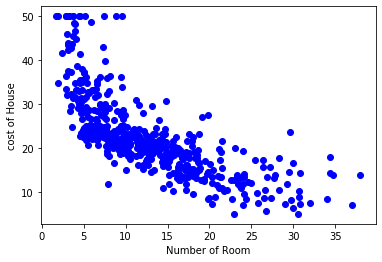

In [55]:
%matplotlib inline
plt.scatter(data, target, color='blue')
plt.xlabel('Lower income population')
plt.ylabel('cost of House')
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
from sklearn.linear_model import Lasso
reg = Lasso()
reg.fit(data,target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
from sklearn.linear_model import Ridge
reg = Ridge()
reg.fit(data,target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
pred = reg.predict(data)

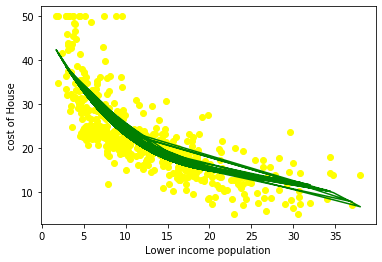

In [54]:
%matplotlib inline
plt.scatter(data, target, color='yellow')
plt.plot(data, pred, color='green')
plt.xlabel('Lower income population')
plt.ylabel('cost of House')
plt.show()

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [46]:
model = make_pipeline(PolynomialFeatures(3),reg)

In [47]:
model.fit(data, target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [48]:
pred = model.predict(data)

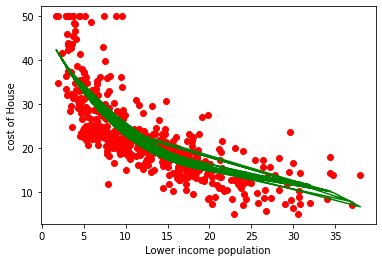

In [49]:
%matplotlib inline
plt.scatter(data, target, color='red')
plt.plot(data, pred, color='green')
plt.xlabel('Lower income population')
plt.ylabel('cost of House')
plt.show()

In [50]:
from sklearn.metrics import r2_score

In [52]:
r2_score(pred,target)

0.4798911810275662